In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import scipy
import string
from scipy.stats import spearmanr

# Read in sortseq data and filter

In [2]:
keepcolsgfp = ['DNAseq', 
            'numreads_per_AD_1AGFP', 'Activity_1AGFP', 'numreads_per_AD_4BGFP', 'Activity_4BGFP',
        
           ]

keepcolscherry = ['DNAseq', 
            'numreads_per_AD_2AmCh', 'Activity_2AmCh', 'numreads_per_AD_5BmCh', 'Activity_5BmCh',
           ]

keepcolsratio = ['DNAseq', 
            'numreads_per_AD_3ARatio_redoseq', 'Activity_3ARatio_redoseq', 'numreads_per_AD_6BRatio', 'Activity_6BRatio'
           ]

FACSgfp = pd.read_csv('BYS4combined.csv', usecols=keepcolsgfp).dropna(how='any')
# FACSgfp['average_gfp'] = FACSgfp[['Activity_1AGFP', 'Activity_4BGFP']].mean(axis=1)

print(FACSgfp.shape)
FACScherry = pd.read_csv('BYS4combined.csv', usecols=keepcolscherry).dropna(how='any')
print(FACScherry.shape)
FACSratio = pd.read_csv('BYS4combined.csv', usecols=keepcolsratio).dropna(how='any')
print(FACSratio.shape)

(7904, 5)
(9077, 5)
(10128, 5)


In [3]:
# filter the facs data:
# at least 1000 reads
readsfiltered_FACSgfp = FACSgfp[(FACSgfp['numreads_per_AD_1AGFP']>=1000) & (FACSgfp['numreads_per_AD_4BGFP']>=1000)]
print(readsfiltered_FACSgfp.shape)
readsfiltered_FACScherry = FACScherry[(FACScherry['numreads_per_AD_2AmCh']>=1000) & (FACScherry['numreads_per_AD_5BmCh']>=1000)]
print(readsfiltered_FACScherry.shape)
readsfiltered_FACSratio = FACSratio[(FACSratio['numreads_per_AD_3ARatio_redoseq']>=1000) & (FACSratio['numreads_per_AD_6BRatio']>=1000)]
print(readsfiltered_FACSratio.shape)

# only 10% difference between the samples
# deciding now to use mean as the reference
filtered_FACSgfp = readsfiltered_FACSgfp.copy(deep=True)
filtered_FACSgfp['pct_diff'] = abs(filtered_FACSgfp['Activity_1AGFP'] - filtered_FACSgfp['Activity_4BGFP'])/((filtered_FACSgfp['Activity_1AGFP'] + filtered_FACSgfp['Activity_4BGFP'])/2)
filtered_FACSgfp = filtered_FACSgfp[filtered_FACSgfp['pct_diff']<=0.10]
print(filtered_FACSgfp.shape)

filtered_FACScherry = readsfiltered_FACScherry.copy(deep=True)
filtered_FACScherry['pct_diff'] = abs(filtered_FACScherry['Activity_2AmCh'] - filtered_FACScherry['Activity_5BmCh'])/((filtered_FACScherry['Activity_2AmCh'] + filtered_FACScherry['Activity_5BmCh'])/2)
filtered_FACScherry = filtered_FACScherry[filtered_FACScherry['pct_diff']<=0.10]
print(filtered_FACScherry.shape)

filtered_FACSratio = readsfiltered_FACSratio.copy(deep=True)
filtered_FACSratio['pct_diff'] = abs(filtered_FACSratio['Activity_3ARatio_redoseq'] - filtered_FACSratio['Activity_6BRatio'])/((filtered_FACSratio['Activity_3ARatio_redoseq'] + filtered_FACSratio['Activity_6BRatio'])/2)
filtered_FACSratio = filtered_FACSratio[filtered_FACSratio['pct_diff']<=0.10]
print(filtered_FACSratio.shape)

# print(filtered_FACSgfp.head())
# print(filtered_FACScherry.head())
# print(filtered_FACSratio.head())

(1418, 5)
(1153, 5)
(5345, 5)
(533, 6)
(361, 6)
(1685, 6)


In [4]:
filtered_FACSgfp.head()

,DNAseq,numreads_per_AD_1AGFP,Activity_1AGFP,numreads_per_AD_4BGFP,Activity_4BGFP,pct_diff
18,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,1110.0,354.728621,2518.0,349.409743,0.015107
91,AAAGAAGATTGGGTTGCTTTGTTTGGTGGTACTGATGAAGAACCAG...,11466.0,3594.296076,9612.0,3946.056907,0.093301
118,AAAGATGCTTTGTTGGATCATACTCCAATGTTTGATGAATTGGACT...,2686.0,8663.808762,3865.0,8958.981791,0.033499
193,AAAGTTCCAGCTCCATTTGAAATTCATTCTGATGTCTTGGATTCTA...,3480.0,8782.000000,4591.0,9064.000000,0.031604
370,AACTTTGATGGTGCTTCATTCTCTTCTCCAGCTATGGCTGCTTCTT...,1453.0,3303.788652,6235.0,3056.259402,0.077839


In [5]:
# add averages btw replicates
filtered_FACSgfp['average_gfp'] = filtered_FACSgfp[['Activity_1AGFP', 'Activity_4BGFP']].mean(axis=1)
filtered_FACScherry['average_mcherry'] = filtered_FACScherry[['Activity_2AmCh', 'Activity_5BmCh']].mean(axis=1)
filtered_FACSratio['average_ratio'] = filtered_FACSratio[['Activity_3ARatio_redoseq', 'Activity_6BRatio']].mean(axis=1)
filtered_FACScherry.head()

,DNAseq,numreads_per_AD_2AmCh,Activity_2AmCh,numreads_per_AD_5BmCh,Activity_5BmCh,pct_diff,average_mcherry
91,AAAGAAGATTGGGTTGCTTTGTTTGGTGGTACTGATGAAGAACCAG...,2940.0,2894.165829,2043.0,3123.003389,0.076062,3008.584609
124,AAAGATTCTGTTCAAGCTTTGTTTGGTGATGATGATATGTTTCCAG...,1650.0,3457.058113,3590.0,3573.602302,0.033153,3515.330207
140,AAAGCTACTGATATGGATTTGTTTGATGACTTTACTGCATTTGAAG...,1213.0,1632.754202,2390.0,1541.754959,0.057331,1587.254580
160,AAAGCTGCTGGTGATTCTGCTCCAGTTGATTCTGCTCCAGCTTTGG...,3180.0,1900.617009,1583.0,2022.253116,0.062014,1961.435062
259,AAATCTCCAATGGAAGTTCCAGCTGATTTGGAAATTACTGAAACTG...,2103.0,3728.458111,4507.0,3539.840475,0.051901,3634.149293


In [6]:
filtered_FACSall = filtered_FACSgfp.merge(filtered_FACScherry, how='outer', on='DNAseq',).merge(filtered_FACSratio, how='outer', on='DNAseq',)
filtered_FACSall

,DNAseq,numreads_per_AD_1AGFP,Activity_1AGFP,numreads_per_AD_4BGFP,Activity_4BGFP,pct_diff_x,average_gfp,numreads_per_AD_2AmCh,Activity_2AmCh,numreads_per_AD_5BmCh,Activity_5BmCh,pct_diff_y,average_mcherry,numreads_per_AD_3ARatio_redoseq,Activity_3ARatio_redoseq,numreads_per_AD_6BRatio,Activity_6BRatio,pct_diff,average_ratio
0,AAACAAGGTAATAAGATGTTCTCTGAATTGGATTTGTTGGACTTTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42578.0,228627.868037,6176.0,226522.091510,0.009253,227574.979774
1,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,1110.0,354.728621,2518.0,349.409743,0.015107,352.069182,NaN,NaN,NaN,NaN,NaN,NaN,59431.0,35367.603436,6966.0,32047.422427,0.098500,33707.512931
2,AAACATGCTTTGCAAAGATTGTCTGCTGCTTCTGTTCCATCTAATT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9960.0,14029.997853,5661.0,14269.288652,0.016911,14149.643253
3,AAACATTCTTCTGTTGCTGGTATTAATGCTAGGAAGAGAGATAAAC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53268.0,63047.606718,1632.0,62791.321893,0.004073,62919.464305
4,AAACCATTGTCTCAATTTATTCCAGAATTGTTGGGATTTCAAGAAG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7272.0,191617.098229,2495.0,194464.528000,0.014750,193040.813115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,TTTGGTTCTACTGACTTTGATAATGGTTCTAATCAATGGTTCTCTT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42960.0,80807.380825,1542.0,76995.413902,0.048313,78901.397363
2161,TTTGGTTCTGACTTTGAATTTCAAAGACAACAACAACAACAACAAC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48801.0,77127.481431,1272.0,83410.176515,0.078271,80268.828973
2162,TTTGTCTTGTCTAGAGATGAATTGTTGACTTTGCCAGAATTTGTCT...,1820.0,2851.698228,2433.0,3015.943270,0.055983,2933.820749,NaN,NaN,NaN,NaN,NaN,NaN,20438.0,181920.561787,2020.0,166296.913752,0.089735,174108.737770
2163,TTTGTCTTGTTTGAAAGATCTCCATCTGTTAGATCTACTCCATCTT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14081.0,32598.894443,1758.0,32534.665049,0.001972,32566.779746


In [7]:
filtered_FACSall[~filtered_FACSall.isna().any(axis=1)]

,DNAseq,numreads_per_AD_1AGFP,Activity_1AGFP,numreads_per_AD_4BGFP,Activity_4BGFP,pct_diff_x,average_gfp,numreads_per_AD_2AmCh,Activity_2AmCh,numreads_per_AD_5BmCh,Activity_5BmCh,pct_diff_y,average_mcherry,numreads_per_AD_3ARatio_redoseq,Activity_3ARatio_redoseq,numreads_per_AD_6BRatio,Activity_6BRatio,pct_diff,average_ratio
149,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,6567.0,8634.474782,16049.0,9016.998304,0.043342,8825.736543,1419.0,2092.418166,2078.0,2270.348722,0.081568,2181.383444,44724.0,260187.491777,14398.0,261589.124156,0.005373,260888.307967
153,AATTTGACTTCTCCATCTATCTTTGATTCTCCAGATGTTGCTGAAT...,8210.0,8584.494573,4905.0,9009.907125,0.048358,8797.200849,2064.0,1760.176052,1021.0,1941.737083,0.098090,1850.956568,68168.0,261629.939015,3036.0,256720.152035,0.018944,259175.045525
569,ATTGATGATGAAGAAATTGTTCCAAGAGATGAAGCATTTAATTCTG...,1376.0,324.848482,1816.0,313.766485,0.034706,319.307483,2132.0,3248.735117,2746.0,3446.443708,0.059060,3347.589412,37944.0,18468.313878,6344.0,16849.181568,0.091690,17658.747723
846,CCAGGTAACTTCTCTCAGAATACTTCTCCAATGTTTACTGATTTGG...,6205.0,8522.960027,8178.0,8749.968683,0.026285,8636.464355,1617.0,984.905822,2165.0,895.986643,0.094550,940.446232,44624.0,261218.133191,8366.0,254451.426533,0.026244,257834.779862
919,GAAACTTCTCCATTGTTTAATGGTGAACAAATTGTTGGTGGTGATG...,7501.0,7754.588157,7492.0,7973.215930,0.027801,7863.902044,1369.0,3315.699744,1464.0,3065.384391,0.078455,3190.542067,57369.0,252888.413468,5916.0,231650.251277,0.087663,242269.332373
978,GAATCTACTTTGAGATCTTATAAGATGCAACAAGAACAAATGAAGA...,2197.0,3211.901328,4253.0,3261.417212,0.015298,3236.659270,1099.0,983.185043,2575.0,972.970733,0.010443,978.077888,28906.0,182163.750409,3180.0,182778.045348,0.003367,182470.897879
1067,GATATGGATTCTCCATTGGCATTTGATGCTTTGGATGAAGCTGGTT...,6593.0,3568.195814,16263.0,3815.698306,0.067038,3691.947060,1254.0,2951.201363,2567.0,2840.259164,0.038312,2895.730263,42269.0,139674.177637,7511.0,136245.514548,0.024853,137959.846093
1179,GCATTTGCTTCTCCAGCTAATCAAACTTATGATTTGTCTACTTCTG...,4637.0,3385.341720,5244.0,3595.994836,0.060348,3490.668278,2261.0,947.614102,2173.0,1016.179164,0.069829,981.896633,37443.0,192781.966319,3905.0,203474.498273,0.053968,198128.232296
1285,GCTTCTCCAATTCAGAATCCAAGAGTTTCTGATTTGTCTCAAGATA...,1257.0,391.450211,1939.0,414.377394,0.056903,402.913802,1867.0,3177.428964,3816.0,3199.286847,0.006856,3188.357906,51255.0,17749.803727,4856.0,19417.475068,0.089739,18583.639398
1323,GCTTTGGCTGGTGATCCATGGTATCCATTGTTTCCACAAGATGATC...,6646.0,3128.352998,3826.0,2866.595454,0.087326,2997.474226,2020.0,3181.785849,1063.0,2964.966449,0.070548,3073.376149,77422.0,87811.481002,2050.0,79861.853791,0.094823,83836.667397


# Check out controls vs data individually

In [6]:
control_annotations = pd.read_csv('Gcn4OrthologData_ToShare_20230414_EC.csv', index_col=0)
control_annotations.head()

,Unnamed: 0.1,Unnamed: 0,ADseq,Name,is_control,ArrayDNA,Activity_SCglucose,TotalReads_SCglucose,Activity_SCglucose_GFP1,TotalReads_SCglucoseGFP1,...,S,T,V,W,Y,Aromatics,WFYL,WFL,WFYLM,WF
0,0,0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_1,experimental,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,50935.24540,6457,1971.036061,3408,...,5,3,1,0,2,3,6,4,7,1
1,1,1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_6,experimental,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,22071.19985,0,0.000000,0,...,5,3,1,0,3,4,6,3,6,1
2,2,2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_11,experimental,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,25945.03809,15804,2068.805513,11299,...,5,4,0,0,2,4,6,4,6,2
3,3,3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_16,experimental,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,22474.23229,6116,1891.851800,4249,...,4,3,0,0,2,4,7,5,7,2
4,4,4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_21,experimental,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,51467.13659,1811,1798.615178,935,...,4,2,0,0,2,4,7,5,7,2


(533, 7)
(20731, 62)
                             Name is_control  average_gfp
65                       CITED2_0       high  8923.000000
70                 CITED2_LWF2A_0        low   461.457715
205                   VP16N_7As_0        low   578.383788
224                  War1_Cterm_0       high  8882.919108
275                     GCN4alt_0       high  8606.639029
304          Gnc4Lib_Kappa_HIGH_0       high  8923.000000
401                    GAL4_AD1_0       high  5269.102237
406                       vp16N_0        mid  3638.338941
484  Gnc4Lib_ChopOrthologs_HIGH_0       high  8894.796853


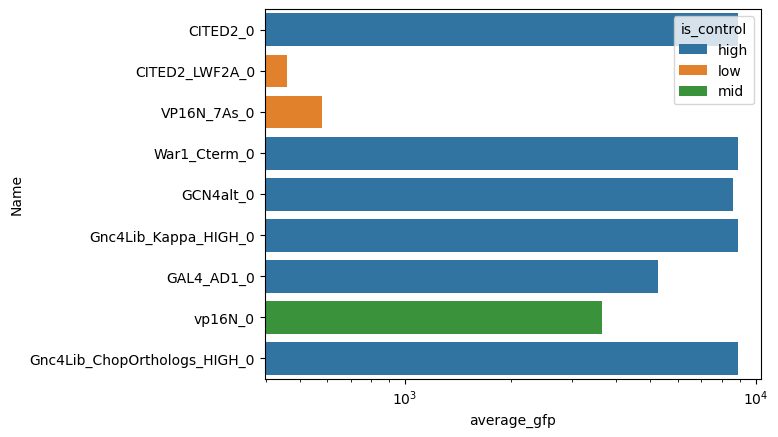

In [35]:
# compare to sortseq
print(filtered_FACSgfp.shape)
print(control_annotations.shape)
test_facsxcontrol = pd.merge(filtered_FACSgfp, control_annotations,
                            left_on='DNAseq', right_on='ArrayDNA')
test_facsxcontrol = test_facsxcontrol[['Name', 'is_control', 'average_gfp']]
print(test_facsxcontrol[test_facsxcontrol['is_control']!='experimental'])

# plot activity of the controls
ax = sns.barplot(test_facsxcontrol[test_facsxcontrol['is_control']!='experimental'],  x='average_gfp', y='Name', hue='is_control')
ax.set_xscale('log') 
plt.show()

In [20]:
# how many controls are there?
ctr_count = control_annotations[control_annotations['is_control']!='experimental']
print(ctr_count.shape[0])

52


(533, 7)
(3309, 4)
                                Name is_control      AD_4_240
204           Gnc4Lib_Disorder_LOW_0        mid  9.795141e-04
456                      VP16N_7As_0        low  6.948732e-05
850                    GCN4_CAAD40_0        mid  1.106875e-04
1032            GCN4_CAAD40_MFYL_A_0        low  1.879172e-04
1050         Gnc4Lib_Disorder_HIGH_0       high  1.465511e-05
1100             Gnc4Lib_Kappa_LOW_0        low  3.500635e-05
1206            Gnc4Lib_Kappa_HIGH_0       high  8.571854e-07
1255           Gnc4Lib_Charge_HIGH_0        mid  9.959942e-05
1368             Gnc4Lib_Kappa_LOW_0        low  1.333338e-04
1973                     VP16C_F2A_0        low  1.172408e-04
2192                     VP16C_F2A_0        low  5.278603e-05
2590                 GCN4alt_FF_AA_0        mid  4.932964e-05
2606                 GCN4alt_ARO_A_0        low  1.871982e-05
2651                     VP16N_7As_0        low  2.374957e-04
2760             Gnc4Lib_Kappa_LOW_0        low  3.

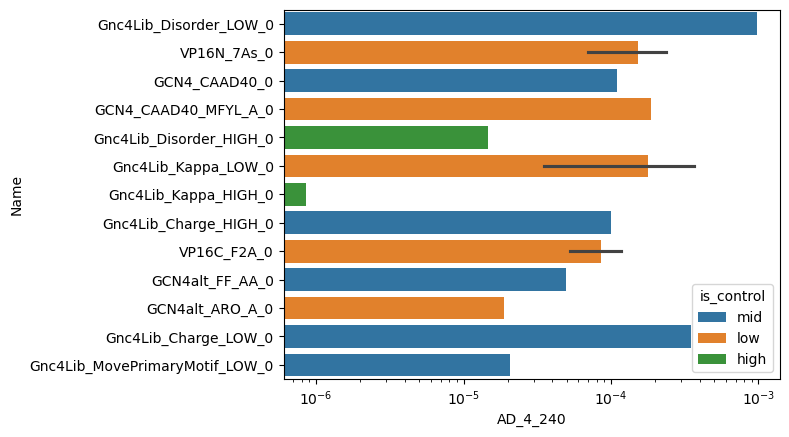

In [42]:
# compare to ciberseq (t=10 has the most controls?)
print(filtered_FACSgfp.shape)
test_t10 = pd.read_csv('t240r_norm_nans.csv', index_col=0)
print(test_t10.shape)
# test_t10
test_ciberxcontrol = pd.merge(test_t10, control_annotations,
                            left_on='Tile', right_on='ArrayDNA')
test_ciberxcontrol = test_ciberxcontrol[['Name', 'is_control', 'AD_4_240']]
print(test_ciberxcontrol[test_ciberxcontrol['is_control']!='experimental'])
print(test_ciberxcontrol[test_ciberxcontrol['is_control']!='experimental'].shape)

# plot activity of the controls
ax = sns.barplot(test_ciberxcontrol[test_ciberxcontrol['is_control']!='experimental'],  x='AD_4_240', y='Name', hue='is_control')
ax.set_xscale('log') 
plt.show()

# Next: merge each with ciber data (see sep4 notes from meeting with max)

In [7]:
def ciberxfacs(ciber_f, facs_df, sorttype, control_f = 'Gcn4OrthologData_ToShare_20230414_EC.csv', ciber_cols=None):
    # ciber tile activity csv filepath
    # facs tile activity csv filepath
    # list of strings containing the columns in that ciber file

    # read in ciberseq csv (containing activity data)
    # ciberdf_all = pd.read_csv(ciber_f, index_col = 0).fillna(1e-8) # in df: rptr bc, tile, libraries
    ciberdf = pd.read_csv(ciber_f, index_col = 0).fillna(1e-8) # in df: rptr bc, tile, libraries
    if ciber_cols is None:
        # Automatically detect float columns if none are specified
        # ciber_cols = ciberdf_all.select_dtypes(include='float').columns.tolist()
        ciber_cols = ciberdf.select_dtypes(include='float').columns.tolist()
    # ciberdf = ciberdf_all.groupby('index_x')[ciber_cols].mean().reset_index() # average multiple instances of rptr bc (ie same tile but diff AD bc)    
    # Include the 'Tile' column by selecting the first occurrence within each group
    # ciberdf['Tile'] = ciberdf_all.groupby('index_x')['Tile'].first().values
    ciberdf['Tile'] = ciberdf.groupby('index_x')['Tile'].first().values
    ciberdf['average_t'] = ciberdf[ciber_cols].mean(axis=1)
    print('Ciber Tile Count:',ciberdf.shape[0])

    print('FACS Tile Count:',facs_df.shape[0])    

    # inner join the df's 
    ciberfacsdf = pd.merge(ciberdf, facs_df,
                       left_on = 'Tile', right_on = 'DNAseq',
                       how= 'inner', )
    ciberfacsdf = ciberfacsdf[['DNAseq', f'average_{sorttype}', 'average_t', 'index_x']] 
    print('FACS/Ciber Intersection Tile Count:',ciberfacsdf.shape[0])
    
    #merge for controls
    control_annotations = pd.read_csv(control_f, index_col=0)
    control_annotations = control_annotations[['Name', 'is_control', 'ArrayDNA']]
    intersectiondf = pd.merge(ciberfacsdf, control_annotations,
                       left_on = 'DNAseq', right_on = 'ArrayDNA',
                       how= 'inner', )
    control_count = intersectiondf[intersectiondf['is_control']!='experimental'].shape[0]
    print('Controls present:', control_count)

    if control_count>0:
        # plot activity of the controls
        ax = sns.barplot(intersectiondf[intersectiondf['is_control']!='experimental'],  x='average_t', y='Name', hue='is_control')
        ax.set_xscale('log') 
        plt.show()
    
    return intersectiondf
    

In [ ]:
def dfs_ciberxfacs(ciber_df, facs_df, sorttype, control_f = 'Gcn4OrthologData_ToShare_20230414_EC.csv', ciber_cols=None):
    # ciber tile activity df -- ad,rptr,ratio for a single time point
    # facs tile activity df
    # list of strings containing the columns in that ciber file

    # read in ciberseq csv (containing activity data)
    # ciberdf_all = pd.read_csv(ciber_f, index_col = 0).fillna(1e-8) # in df: rptr bc, tile, libraries
    ciberdf = pd.read_csv(ciber_f, index_col = 0).fillna(1e-8) # in df: rptr bc, tile, libraries
    if ciber_cols is None:
        # Automatically detect float columns if none are specified
        # ciber_cols = ciberdf_all.select_dtypes(include='float').columns.tolist()
        ciber_cols = ciberdf.select_dtypes(include='float').columns.tolist()
    # ciberdf = ciberdf_all.groupby('index_x')[ciber_cols].mean().reset_index() # average multiple instances of rptr bc (ie same tile but diff AD bc)    
    # Include the 'Tile' column by selecting the first occurrence within each group
    # ciberdf['Tile'] = ciberdf_all.groupby('index_x')['Tile'].first().values
    ciberdf['Tile'] = ciberdf.groupby('index_x')['Tile'].first().values
    ciberdf['average_t'] = ciberdf[ciber_cols].mean(axis=1)
    print('Ciber Tile Count:',ciberdf.shape[0])

    print('FACS Tile Count:',facs_df.shape[0])    

    # inner join the df's 
    ciberfacsdf = pd.merge(ciberdf, facs_df,
                       left_on = 'Tile', right_on = 'DNAseq',
                       how= 'inner', )
    ciberfacsdf = ciberfacsdf[['DNAseq', f'average_{sorttype}', 'average_t', 'index_x']] 
    print('FACS/Ciber Intersection Tile Count:',ciberfacsdf.shape[0])
    
    #merge for controls
    control_annotations = pd.read_csv(control_f, index_col=0)
    control_annotations = control_annotations[['Name', 'is_control', 'ArrayDNA']]
    intersectiondf = pd.merge(ciberfacsdf, control_annotations,
                       left_on = 'DNAseq', right_on = 'ArrayDNA',
                       how= 'inner', )
    control_count = intersectiondf[intersectiondf['is_control']!='experimental'].shape[0]
    print('Controls present:', control_count)

    if control_count>0:
        # plot activity of the controls
        ax = sns.barplot(intersectiondf[intersectiondf['is_control']!='experimental'],  x='average_t', y='Name', hue='is_control')
        ax.set_xscale('log') 
        plt.show()
    
    return intersectiondf
    

## GFPsort vs RPTR BC by hand

Ciber Tile Count: 3286
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 3731
Controls present: 10


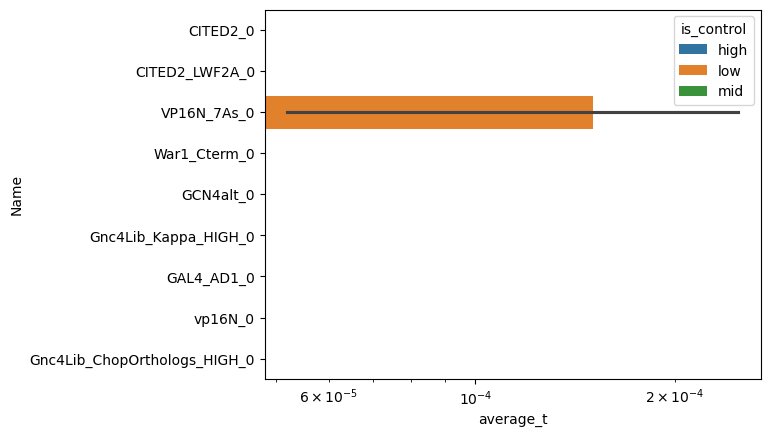

,DNAseq,average_gfp,average_t,index_x,Name,is_control,ArrayDNA
0,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,352.069182,0.000003,AGGCCGCTGAAAAT,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...
1,AAAGAAGATTGGGTTGCTTTGTTTGGTGGTACTGATGAAGAACCAG...,3770.176491,NaN,NaN,Cpar_CPAG02317_111,experimental,AAAGAAGATTGGGTTGCTTTGTTTGGTGGTACTGATGAAGAACCAG...
2,AAAGATGCTTTGTTGGATCATACTCCAATGTTTGATGAATTGGACT...,8811.395276,NaN,NaN,Cort_emb_CCG25633.1_CandidaOrthopsilosis_81,experimental,AAAGATGCTTTGTTGGATCATACTCCAATGTTTGATGAATTGGACT...
3,AAAGTTCCAGCTCCATTTGAAATTCATTCTGATGTCTTGGATTCTA...,8923.000000,NaN,NaN,Ctro_CTRG02060.3_46,experimental,AAAGTTCCAGCTCCATTTGAAATTCATTCTGATGTCTTGGATTCTA...
4,AACTTTGATGGTGCTTCATTCTCTTCTCCAGCTATGGCTGCTTCTT...,3180.024027,0.000002,TCACCGCGACACCT,Sordariomycetes_jgi|OphPMI507_1|340001|estExt_...,experimental,AACTTTGATGGTGCTTCATTCTCTTCTCCAGCTATGGCTGCTTCTT...
...,...,...,...,...,...,...,...
540,TTTGATTTGGGTGACTTTCCAGCTTCTCCAGATGTTTCTCCAGATG...,4773.288126,NaN,NaN,Lecanoromycetes_jgi|LobpulSc1|2114391|e_gw1.20...,experimental,TTTGATTTGGGTGACTTTCCAGCTTCTCCAGATGTTTCTCCAGATG...
541,TTTGCTGATGCATTTGGTTCTGCTCCACCATCTGCTGCATTTACTA...,3983.399952,NaN,NaN,Dothideomycetes_jgi|Boeex1|57121|CE57120_13121...,experimental,TTTGCTGATGCATTTGGTTCTGCTCCACCATCTGCTGCATTTACTA...
542,TTTGGTGATGACTTCTCTTCTCCAGAATCTACTATGTTGTCTCCAC...,3300.190021,NaN,NaN,Eurotiomycetes_jgi|Aspca3|130068|estExt_Genema...,experimental,TTTGGTGATGACTTCTCTTCTCCAGAATCTACTATGTTGTCTCCAC...
543,TTTGGTTATGATGTTTCTCCAGGATTTGGTTCTACTGACTTTGATA...,3863.024461,NaN,NaN,Sordariomycetes_jgi|Sodal1|321031|fgenesh1_pg....,experimental,TTTGGTTATGATGTTTCTCCAGGATTTGGTTCTACTGACTTTGATA...


In [10]:
a5 = ciberxfacs('t5r_norm_nans.csv', filtered_FACSgfp, 'gfp') #outer join
a5

Ciber Tile Count: 3286
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 99


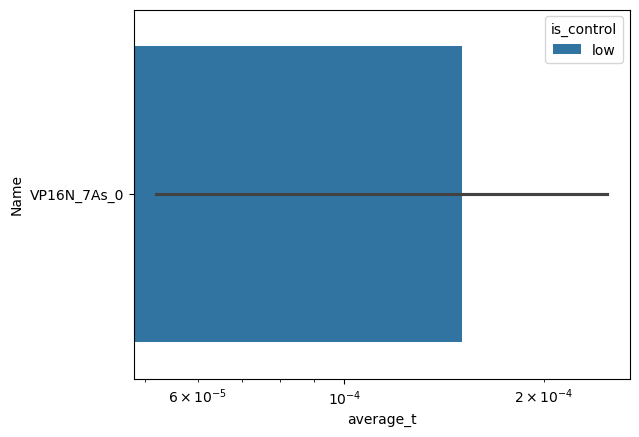

In [23]:
 a5 = ciberxfacs('t5r_norm_nans.csv', filtered_FACSgfp, 'gfp')

Ciber Tile Count: 3286
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1340


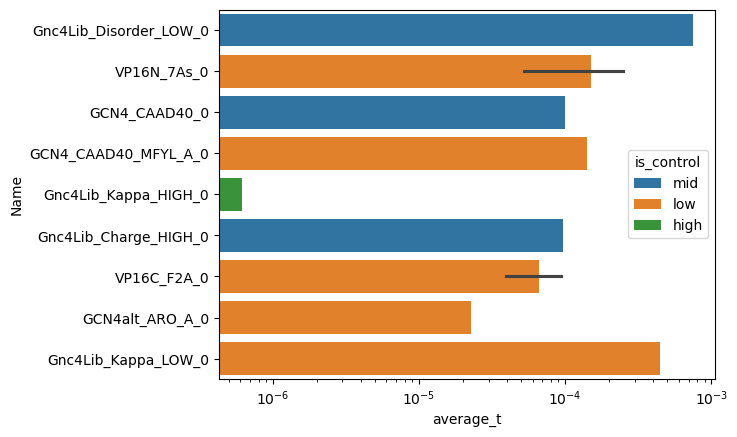

In [24]:
b5 = ciberxfacs('t5r_norm_nans.csv', FACSgfp, 'gfp') #added average gfp to this df

Ciber Tile Count: 3280
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 99


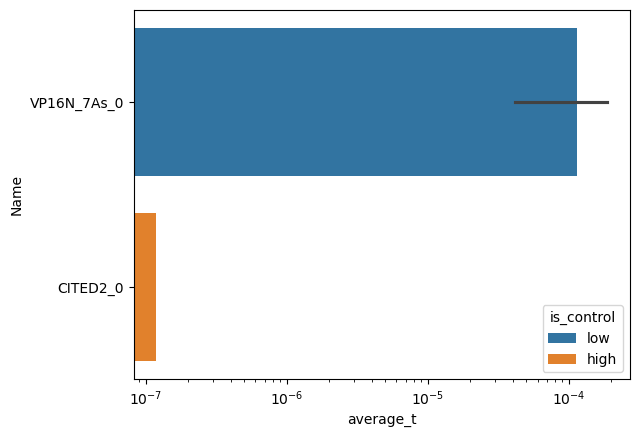

In [25]:
a10 = ciberxfacs('t10r_norm_nans.csv', filtered_FACSgfp, 'gfp')

Ciber Tile Count: 3280
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1337


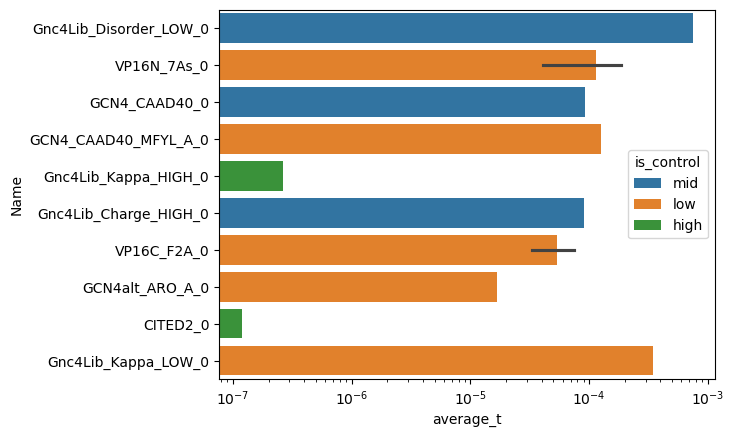

In [26]:
b10 = ciberxfacs('t10r_norm_nans.csv', FACSgfp, 'gfp')

Ciber Tile Count: 3278
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101


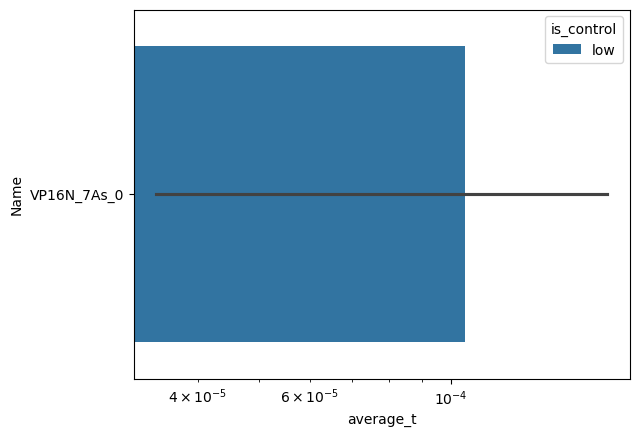

In [27]:
a15 = ciberxfacs('t15r_norm_nans.csv', filtered_FACSgfp, 'gfp')

Ciber Tile Count: 3278
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1339


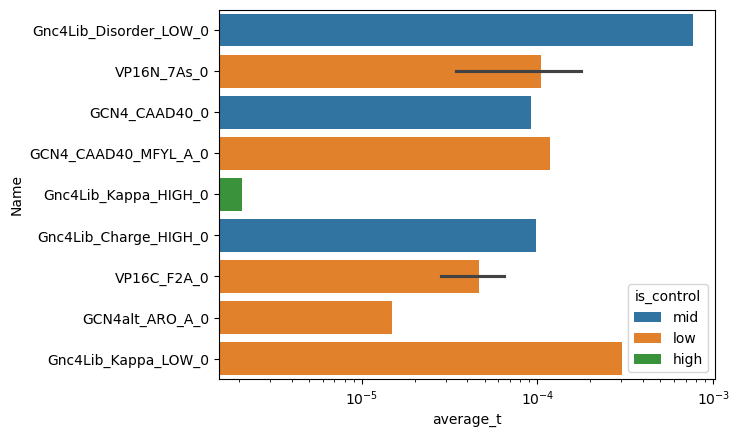

In [28]:
b15 = ciberxfacs('t15r_norm_nans.csv', FACSgfp, 'gfp')

Ciber Tile Count: 3280
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101


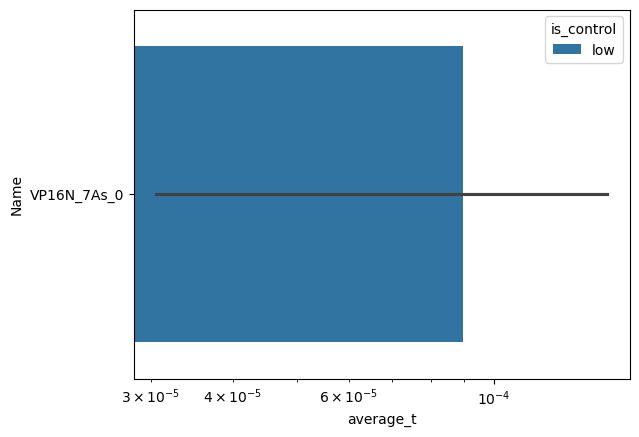

In [29]:
a30 = ciberxfacs('t30r_norm_nans.csv', filtered_FACSgfp, 'gfp')

Ciber Tile Count: 3280
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1339


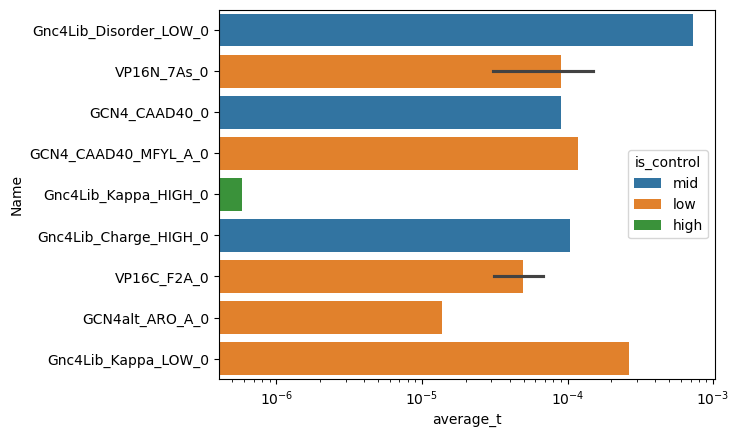

In [30]:
b30 = ciberxfacs('t30r_norm_nans.csv', FACSgfp, 'gfp')

Ciber Tile Count: 3319
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101


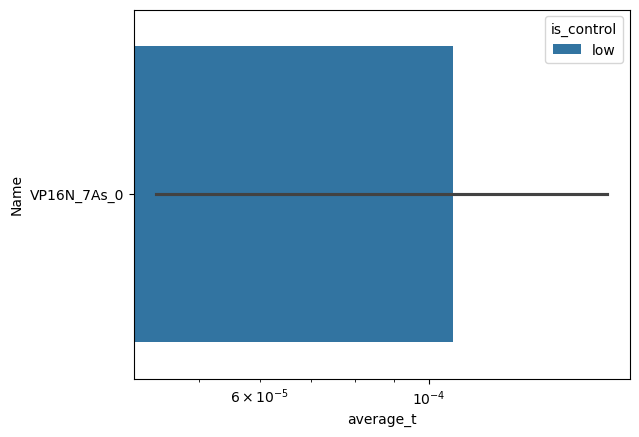

In [31]:
a180 = ciberxfacs('t180r_norm_nans.csv', filtered_FACSgfp, 'gfp')

Ciber Tile Count: 3319
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1352


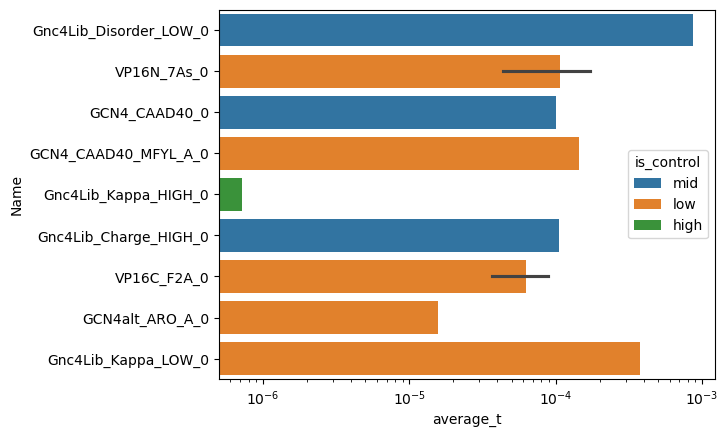

In [32]:
b180 = ciberxfacs('t180r_norm_nans.csv', FACSgfp, 'gfp')

Ciber Tile Count: 3309
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101
Controls present: 2


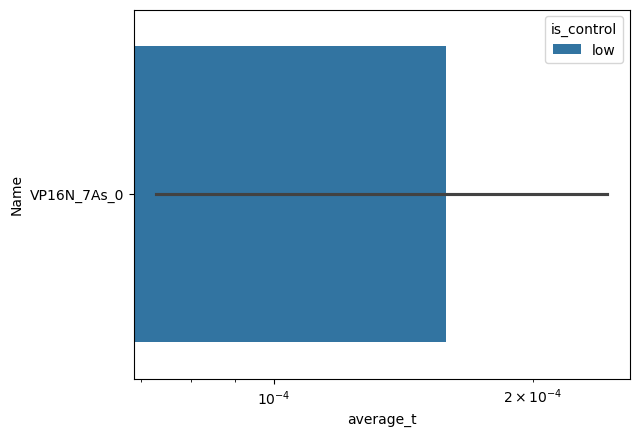

,DNAseq,average_gfp,average_t,Name,is_control,ArrayDNA
0,TCTAATGCTGCTGGTACTATTTCTCCACAAGATTTGTTGATTCATG...,3190.588365,0.000107,Sordariomycetes_jgi|Plecucu2|161010|estExt_Gen...,experimental,TCTAATGCTGCTGGTACTATTTCTCCACAAGATTTGTTGATTCATG...
1,ATTGCTGGTGCTCCATCTGGTACTATTTCTCCACAAGATTTGATGA...,5713.039007,0.000012,Eurotiomycetes_jgi|Eurhe1|379875|gm1.6590_g_291,experimental,ATTGCTGGTGCTCCATCTGGTACTATTTCTCCACAAGATTTGATGA...
2,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,8527.457844,0.000531,Saccharomycotina_jgi|Nadfu1|51114|gm1.2755_g_116,experimental,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...
3,TTGAATTTGCAGAATGTTGGTTTGTCTGCTGGTGCTTCTCCAGATT...,6436.217736,0.000011,Pezizomycetes_jgi|Ascim1|93291|CE93290_30315_176,experimental,TTGAATTTGCAGAATGTTGGTTTGTCTGCTGGTGCTTCTCCAGATT...
4,GCTCCACCATCTGCTTCATTTACTGATTTGTCTACTCCATCATTTG...,2951.862507,0.000461,Eurotiomycetes_jgi|Asptam1|289766|fgenesh1_pm....,experimental,GCTCCACCATCTGCTTCATTTACTGATTTGTCTACTCCATCATTTG...
...,...,...,...,...,...,...
96,GCTCCACCATCTGCATTCTTGTTGCCAACTTATACTAGAGGTTCTC...,3269.668625,0.000679,Sordariomycetes_jgi|Lasov1|608193|fgenesh1_kg....,experimental,GCTCCACCATCTGCATTCTTGTTGCCAACTTATACTAGAGGTTCTC...
97,TCTTTGTATGAATCTCCAGACTTTGGTTATGATGTTTCTCCAGGAT...,7604.340439,0.000500,Sordariomycetes_jgi|Sodal1|381900|estExt_Genem...,experimental,TCTTTGTATGAATCTCCAGACTTTGGTTATGATGTTTCTCCAGGAT...
98,TCTTTGACTTCTCCATCTGACTTTAATGATTCTCCATATGGTGATT...,5243.393909,0.003110,Sordariomycetes_jgi|OphPMI507_1|434063|gm1.879...,experimental,TCTTTGACTTCTCCATCTGACTTTAATGATTCTCCATATGGTGATT...
99,ACTGATATGGAATTGGGTCCAGGTGTTGAAGAATGGGGTTCTTTGT...,8739.589216,0.000292,Eurotiomycetes_jgi|Asptam1|289766|fgenesh1_pm....,experimental,ACTGATATGGAATTGGGTCCAGGTGTTGAAGAATGGGGTTCTTTGT...


In [31]:
a240 = ciberxfacs('t240r_norm_nans.csv', filtered_FACSgfp, 'gfp')
a240

Ciber Tile Count: 3309
FACS Tile Count: 7904
FACS/Ciber Intersection Tile Count: 1351


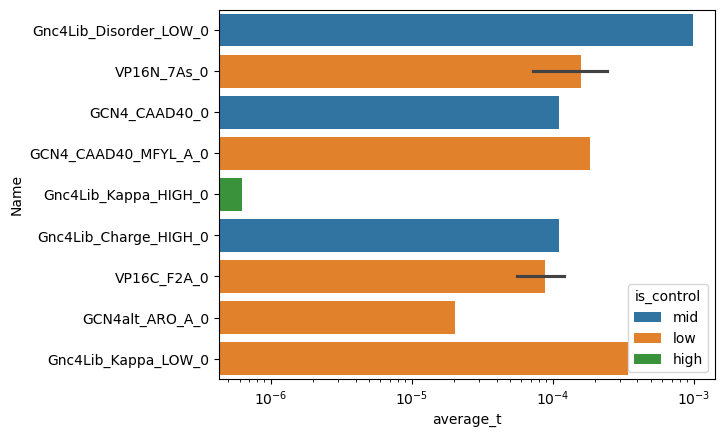

In [34]:
b240 = ciberxfacs('t240r_norm_nans.csv', FACSgfp, 'gfp') #added average gfp to this df

## GFP, AD and Ratio correlations, automated

In [8]:
times = ['5','10','15','30','180','240']
rptr_csvs =[]
ad_csvs = []
ratio_csvs = []
for t in times:
    t_rptr = f't{t}r_norm_nans.csv'
    rptr_csvs.append(t_rptr)
    t_ad = f't{t}a_norm_nans.csv'
    ad_csvs.append(t_ad)
    t_ratio = f't{t}ratio_norm_nans.csv'
    ratio_csvs.append(t_ratio)

In [11]:
adxcherry_list = []
for a in ad_csvs:
    print(f'processing {a}')
    axc = ciberxfacs(a, filtered_FACScherry, 'mcherry')
    axc['time_type'] = a.split('_')[0]
    adxcherry_list.append(axc)
adxcherry_list[0]

processing t5a_norm_nans.csv
Ciber Tile Count: 3286
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 66
Controls present: 0
processing t10a_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 66
Controls present: 0
processing t15a_norm_nans.csv
Ciber Tile Count: 3278
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 67
Controls present: 0
processing t30a_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 66
Controls present: 0
processing t180a_norm_nans.csv
Ciber Tile Count: 3319
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 66
Controls present: 0
processing t240a_norm_nans.csv
Ciber Tile Count: 3309
FACS Tile Count: 361
FACS/Ciber Intersection Tile Count: 68
Controls present: 0


,DNAseq,average_mcherry,average_t,index_x,Name,is_control,ArrayDNA,time_type
0,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,1752.996747,0.000116,AAAGAAGGCCCTGC,Saccharomycotina_jgi|Nadfu1|51114|gm1.2755_g_116,experimental,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,t5a
1,CAACCATCTACTACTGCTGTTCAAGATTCTCCAGCTGAAGCTTCTG...,3213.599907,0.000010,ACAAATCCCCAGGG,Sordariomycetes_jgi|Plecucu2|161010|estExt_Gen...,experimental,CAACCATCTACTACTGCTGTTCAAGATTCTCCAGCTGAAGCTTCTG...,t5a
2,GACTTTACTGGATTTGAAGGTGGTGCTTCTACTGCTTATTCTTCTC...,1887.542574,0.000056,ACAACTTACACGAC,Sordariomycetes_jgi|Acral2|2027520|fgenesh1_pg...,experimental,GACTTTACTGGATTTGAAGGTGGTGCTTCTACTGCTTATTCTTCTC...,t5a
3,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,2181.383444,0.000373,ACCCGTCATGACCC,Dothideomycetes_jgi|Epini1|414228|fgenesh1_kg....,experimental,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,t5a
4,ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...,901.660682,0.000206,ACTGCTCCTCCCTG,Leotiomycetes_jgi|Rhier1|597612|estExt_Genewis...,experimental,ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...,t5a
...,...,...,...,...,...,...,...,...
61,GCTTTGATTCCAGTTGATGAAGCTGGTGATTCTCATCCAGCTGATA...,3005.798121,0.000075,TGTATCAGAAGGGC,Leotiomycetes_jgi|Melbi2|694641|MIX5590_279423...,experimental,GCTTTGATTCCAGTTGATGAAGCTGGTGATTCTCATCCAGCTGATA...,t5a
62,AGATCTAGAGATTCTCAACAATCTGCTGATATGGAATTGTTTGGTG...,1233.310564,0.000102,TTAATCTCGACGGT,Leotiomycetes_jgi|Bissp1|505693|e_gw1.10.594.1_16,experimental,AGATCTAGAGATTCTCAACAATCTGCTGATATGGAATTGTTTGGTG...,t5a
63,GCTTTGGCTGGTGCTGGTGGTGCTTCTGCTCCTAAGAAAGGTTCTG...,3004.146804,0.000020,TTCAGATAAATCGC,Ecym_4497_196,experimental,GCTTTGGCTGGTGCTGGTGGTGCTTCTGCTCCTAAGAAAGGTTCTG...,t5a
64,GATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTG...,1095.302016,0.000264,TTCGACTACAATAT,Eurotiomycetes_jgi|Gymci1_1|285057|e_gw1.40.16...,experimental,GATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTG...,t5a


processing t5r_norm_nans.csv
Ciber Tile Count: 3286
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 99
Controls present: 2


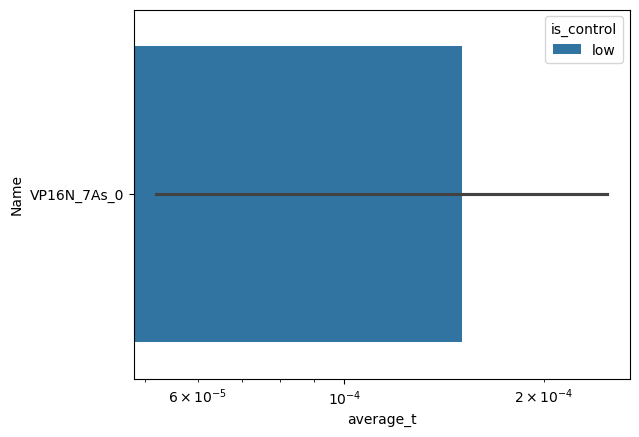

processing t10r_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 99
Controls present: 3


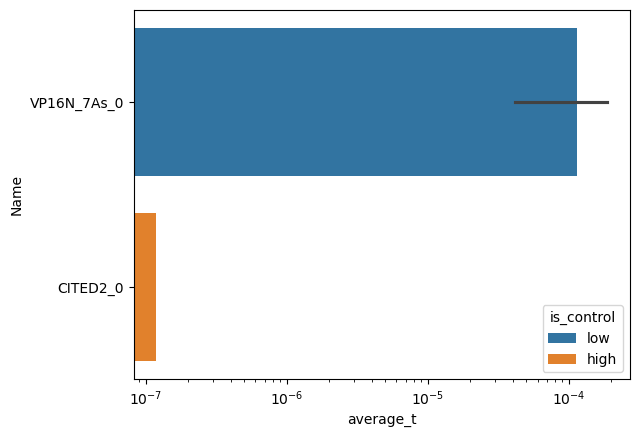

processing t15r_norm_nans.csv
Ciber Tile Count: 3278
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101
Controls present: 2


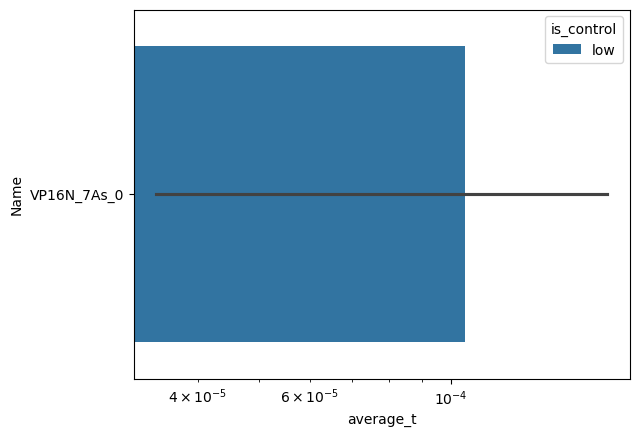

processing t30r_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101
Controls present: 2


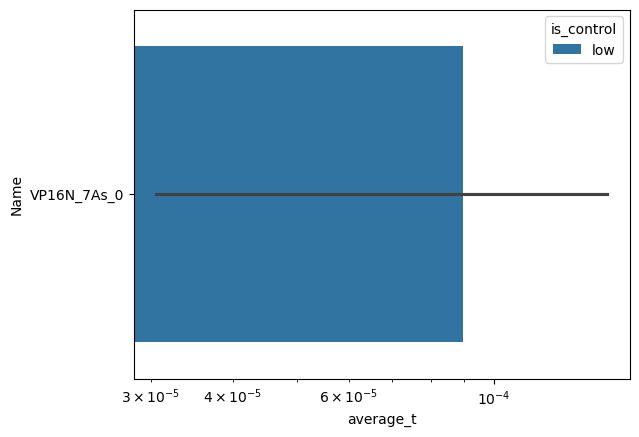

processing t180r_norm_nans.csv
Ciber Tile Count: 3319
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101
Controls present: 2


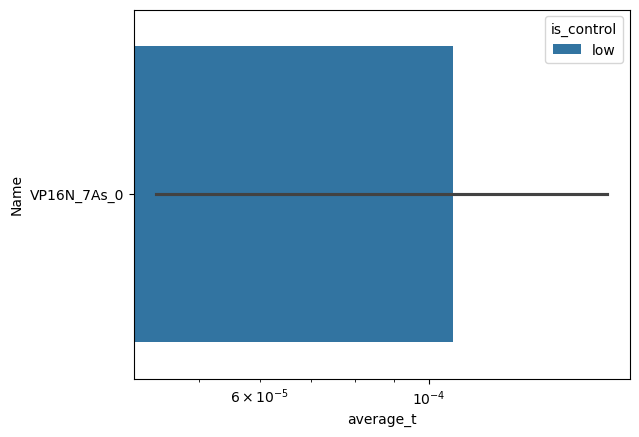

processing t240r_norm_nans.csv
Ciber Tile Count: 3309
FACS Tile Count: 533
FACS/Ciber Intersection Tile Count: 101
Controls present: 2


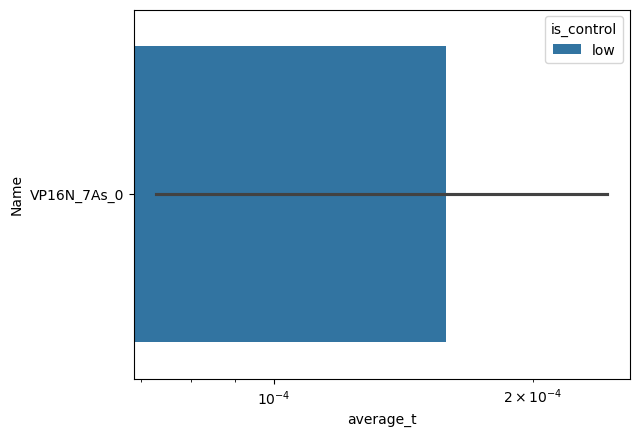

,DNAseq,average_gfp,average_t,index_x,Name,is_control,ArrayDNA,time_type
0,TCTAATGCTGCTGGTACTATTTCTCCACAAGATTTGTTGATTCATG...,3190.588365,0.000076,AAACCACACTTCGG,Sordariomycetes_jgi|Plecucu2|161010|estExt_Gen...,experimental,TCTAATGCTGCTGGTACTATTTCTCCACAAGATTTGTTGATTCATG...,t5r
1,ATTGCTGGTGCTCCATCTGGTACTATTTCTCCACAAGATTTGATGA...,5713.039007,0.000018,AAACTTATCTAGTC,Eurotiomycetes_jgi|Eurhe1|379875|gm1.6590_g_291,experimental,ATTGCTGGTGCTCCATCTGGTACTATTTCTCCACAAGATTTGATGA...,t5r
2,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,8527.457844,0.000516,AAAGAAGGCCCTGC,Saccharomycotina_jgi|Nadfu1|51114|gm1.2755_g_116,experimental,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,t5r
3,TTGAATTTGCAGAATGTTGGTTTGTCTGCTGGTGCTTCTCCAGATT...,6436.217736,0.000014,AACTACCAGAATGA,Pezizomycetes_jgi|Ascim1|93291|CE93290_30315_176,experimental,TTGAATTTGCAGAATGTTGGTTTGTCTGCTGGTGCTTCTCCAGATT...,t5r
4,GCTCCACCATCTGCTTCATTTACTGATTTGTCTACTCCATCATTTG...,2951.862507,0.000346,ACAAAGTCACTTTT,Eurotiomycetes_jgi|Asptam1|289766|fgenesh1_pm....,experimental,GCTCCACCATCTGCTTCATTTACTGATTTGTCTACTCCATCATTTG...,t5r
...,...,...,...,...,...,...,...,...
94,TCTTTGTATGAATCTCCAGACTTTGGTTATGATGTTTCTCCAGGAT...,7604.340439,0.000559,TTATAACTAGATGT,Sordariomycetes_jgi|Sodal1|381900|estExt_Genem...,experimental,TCTTTGTATGAATCTCCAGACTTTGGTTATGATGTTTCTCCAGGAT...,t5r
95,TCTTTGACTTCTCCATCTGACTTTAATGATTCTCCATATGGTGATT...,5243.393909,0.002782,TTATACCTTTATAA,Sordariomycetes_jgi|OphPMI507_1|434063|gm1.879...,experimental,TCTTTGACTTCTCCATCTGACTTTAATGATTCTCCATATGGTGATT...,t5r
96,ACTGATATGGAATTGGGTCCAGGTGTTGAAGAATGGGGTTCTTTGT...,8739.589216,0.000321,TTATTTAGTACTCT,Eurotiomycetes_jgi|Asptam1|289766|fgenesh1_pm....,experimental,ACTGATATGGAATTGGGTCCAGGTGTTGAAGAATGGGGTTCTTTGT...,t5r
97,AATGACTTTGATACTACTGTCTTGTCTCCACAACAATTCTCTACTG...,3643.979230,0.001711,TTCTAGGGAACTCG,Eurotiomycetes_jgi|Eurhe1|484251|estExt_Genewi...,experimental,AATGACTTTGATACTACTGTCTTGTCTCCACAACAATTCTCTACTG...,t5r


In [12]:
rptrxgfp_list = []
for a in rptr_csvs:
    print(f'processing {a}')
    axc = ciberxfacs(a, filtered_FACSgfp, 'gfp')
    axc['time_type'] = a.split('_')[0]
    rptrxgfp_list.append(axc)
rptrxgfp_list[0]

processing t5ratio_norm_nans.csv
Ciber Tile Count: 3286
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 279
Controls present: 3


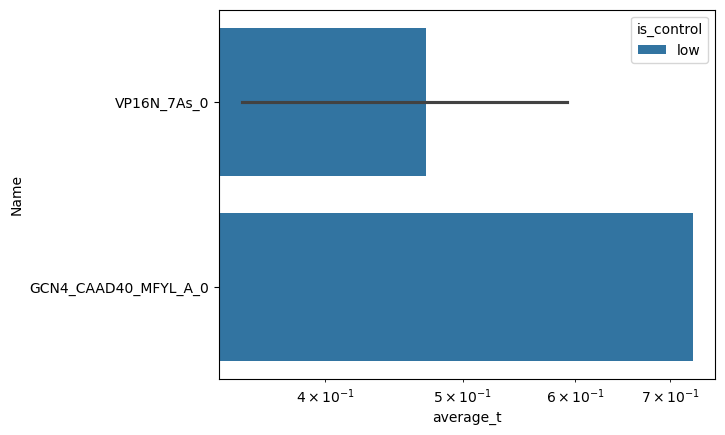

processing t10ratio_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 275
Controls present: 4


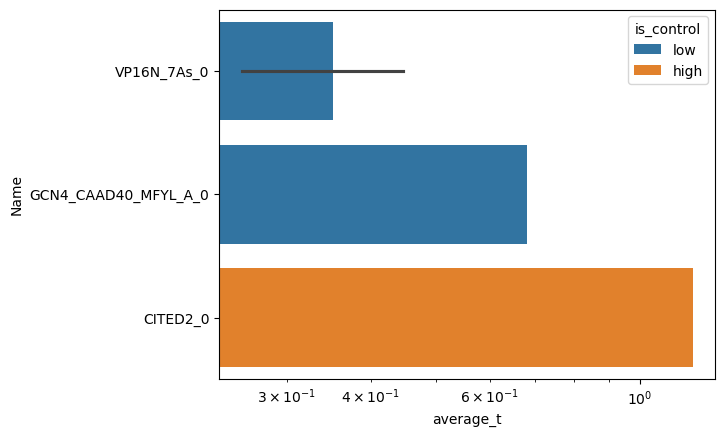

processing t15ratio_norm_nans.csv
Ciber Tile Count: 3278
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 275
Controls present: 3


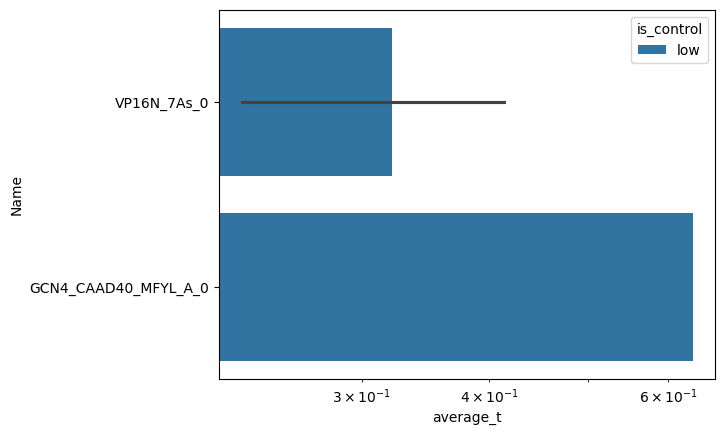

processing t30ratio_norm_nans.csv
Ciber Tile Count: 3280
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 275
Controls present: 3


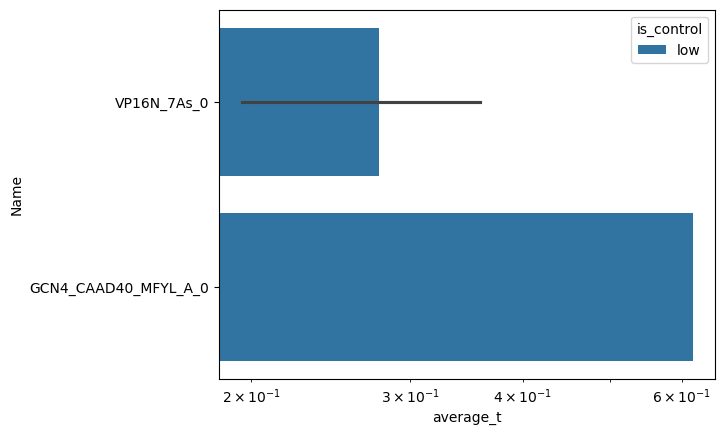

processing t180ratio_norm_nans.csv
Ciber Tile Count: 3319
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 281
Controls present: 3


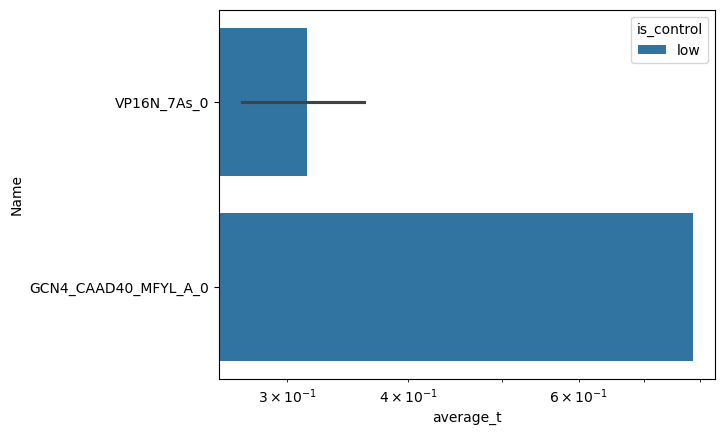

processing t240ratio_norm_nans.csv
Ciber Tile Count: 3309
FACS Tile Count: 1685
FACS/Ciber Intersection Tile Count: 279
Controls present: 3


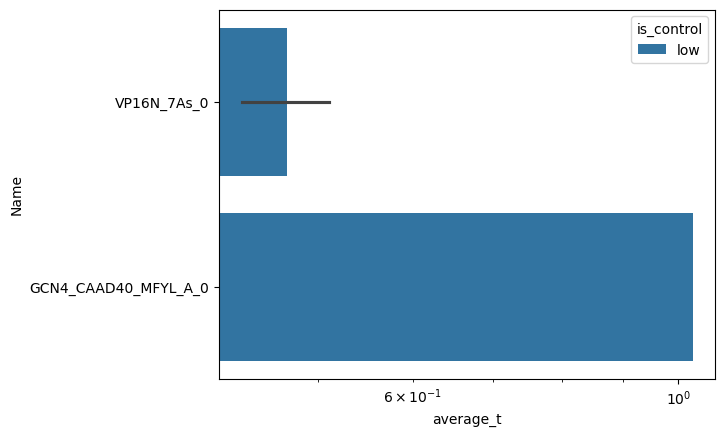

,DNAseq,average_ratio,average_t,index_x,Name,is_control,ArrayDNA,time_type
0,GGTGATTCTCATCCAGCTGATATGGATTTGTTTGATGAATTTACTG...,125041.446570,1.377261,AAACCTCTTAGAAA,Leotiomycetes_jgi|Melbi2|536739|e_gw1.124.299....,experimental,GGTGATTCTCATCCAGCTGATATGGATTTGTTTGATGAATTTACTG...,t5ratio
1,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,255254.458683,4.450232,AAAGAAGGCCCTGC,Saccharomycotina_jgi|Nadfu1|51114|gm1.2755_g_116,experimental,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,t5ratio
2,AATAATTCTCATAGAAGGAAATCTTCTGTTAATGGTTCTCCAGTTA...,27210.799795,0.395432,AACGAATAAATCGT,Dothideomycetes_jgi|Didsa1|381788|estExt_Genew...,experimental,AATAATTCTCATAGAAGGAAATCTTCTGTTAATGGTTCTCCAGTTA...,t5ratio
3,ACTTCTAGAAGAAGATCTGGTACTACTTCTTCTCCACCATCTGGTA...,31844.750940,0.222946,AACGACCGGCTTTC,Leotiomycetes_jgi|Rhier1|597612|estExt_Genewis...,experimental,ACTTCTAGAAGAAGATCTGGTACTACTTCTTCTCCACCATCTGGTA...,t5ratio
4,TCTGCTTCTACTCAAGGTTTGTTCTGTTCTTCTACTTTGGATTTGC...,43047.319201,0.378553,AAGACATTCAATAA,Eurotiomycetes_jgi|Aspwest1|288254|MIX3379_623...,experimental,TCTGCTTCTACTCAAGGTTTGTTCTGTTCTTCTACTTTGGATTTGC...,t5ratio
...,...,...,...,...,...,...,...,...
274,CATGATACTTCTTCTCCATCTATTGGTCCAACTATTTCTCCAAGAG...,119746.106082,0.887806,TTGACCTGATAGCC,Pezizomycetes_jgi|Chove1|1732155|estExt_Genewi...,experimental,CATGATACTTCTTCTCCATCTATTGGTCCAACTATTTCTCCAAGAG...,t5ratio
275,GATACTATTGATCCACAAAGATCTTCTTCTCCACCAGTTAATCCAT...,20348.419393,9.759355,TTGTGTATGCTGGT,Eurotiomycetes_jgi|Monpu1|511148|gm1.6622_g_16,experimental,GATACTATTGATCCACAAAGATCTTCTTCTCCACCAGTTAATCCAT...,t5ratio
276,AATTATTCTACTCAATCTGTTTCTTCTTCTACTTCTGAATCTCCAT...,26813.847824,0.722943,TTTGCCCCAGTGAT,Xylonomycetes_jgi|Trigu1|1079454|gm1.247_g_821,experimental,AATTATTCTACTCAATCTGTTTCTTCTTCTACTTCTGAATCTCCAT...,t5ratio
277,TTTACTGCATTTGGTGGTGGTGCTACTACTGCATTCTCTTCTCCAG...,39299.149182,0.615620,TTTGTCACCTAAAC,Sordariomycetes_jgi|Entma1|346888|fgenesh1_pg....,experimental,TTTACTGCATTTGGTGGTGGTGCTACTACTGCATTCTCTTCTCCAG...,t5ratio


In [13]:
ratioxfratio_list = []
for a in ratio_csvs:
    print(f'processing {a}')
    axc = ciberxfacs(a, filtered_FACSratio, 'ratio')
    axc['time_type'] = a.split('_')[0]
    ratioxfratio_list.append(axc)
ratioxfratio_list[0]

# Now compare everything to everything

In [14]:
alldata_list = adxcherry_list+rptrxgfp_list+ratioxfratio_list
alldata_cat = pd.concat(alldata_list, ignore_index=True)
alldata_cat[alldata_cat['average_t']>0]

,DNAseq,average_mcherry,average_t,index_x,Name,is_control,ArrayDNA,time_type,average_gfp,average_ratio
0,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,1752.996747,0.000116,AAAGAAGGCCCTGC,Saccharomycotina_jgi|Nadfu1|51114|gm1.2755_g_116,experimental,TTGACTTCTGATTCATTTGTTGATTCTTTGGTTAATTCTTTGGATG...,t5a,NaN,NaN
1,CAACCATCTACTACTGCTGTTCAAGATTCTCCAGCTGAAGCTTCTG...,3213.599907,0.000010,ACAAATCCCCAGGG,Sordariomycetes_jgi|Plecucu2|161010|estExt_Gen...,experimental,CAACCATCTACTACTGCTGTTCAAGATTCTCCAGCTGAAGCTTCTG...,t5a,NaN,NaN
2,GACTTTACTGGATTTGAAGGTGGTGCTTCTACTGCTTATTCTTCTC...,1887.542574,0.000056,ACAACTTACACGAC,Sordariomycetes_jgi|Acral2|2027520|fgenesh1_pg...,experimental,GACTTTACTGGATTTGAAGGTGGTGCTTCTACTGCTTATTCTTCTC...,t5a,NaN,NaN
3,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,2181.383444,0.000373,ACCCGTCATGACCC,Dothideomycetes_jgi|Epini1|414228|fgenesh1_kg....,experimental,AATTTGACTTCTCCAGATATTGATGCTTCTCCATTTATTAATGATT...,t5a,NaN,NaN
4,ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...,901.660682,0.000206,ACTGCTCCTCCCTG,Leotiomycetes_jgi|Rhier1|597612|estExt_Genewis...,experimental,ACTTCTTCTGGTTTGAGATCTGTTAGAGAAGTTTCTGAACCAGTTA...,t5a,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2660,TCTGTTTCTGGTGTTGGTTCTAGGAAGAGAGATAAACCATTGCCAC...,NaN,0.301697,TTGAATCATACCTG,Leotiomycetes_jgi|Amore1|104599|e_gw1.8.212.1_116,experimental,TCTGTTTCTGGTGTTGGTTCTAGGAAGAGAGATAAACCATTGCCAC...,t240ratio,NaN,54126.447088
2661,TTGCCACAAACTGTTACTACTTCTGATGCTAAGACTGTCTTGCCAA...,NaN,4.863769,TTGACCATCCCAAC,Spar_spar361_g1.1_71,experimental,TTGCCACAAACTGTTACTACTTCTGATGCTAAGACTGTCTTGCCAA...,t240ratio,NaN,211594.933221
2662,CATGATACTTCTTCTCCATCTATTGGTCCAACTATTTCTCCAAGAG...,NaN,1.048039,TTGACCTGATAGCC,Pezizomycetes_jgi|Chove1|1732155|estExt_Genewi...,experimental,CATGATACTTCTTCTCCATCTATTGGTCCAACTATTTCTCCAAGAG...,t240ratio,NaN,119746.106082
2663,GATACTATTGATCCACAAAGATCTTCTTCTCCACCAGTTAATCCAT...,NaN,11.403311,TTGTGTATGCTGGT,Eurotiomycetes_jgi|Monpu1|511148|gm1.6622_g_16,experimental,GATACTATTGATCCACAAAGATCTTCTTCTCCACCAGTTAATCCAT...,t240ratio,NaN,20348.419393


In [15]:
# pivot on A_normalized (later Ratio)
alldata_cibercollapsed = alldata_cat.pivot_table(index='index_x', columns='time_type', values='average_t').reset_index()

alldata_cibercollapsed = pd.merge(alldata_cibercollapsed, alldata_cat[['index_x', 'is_control',]].drop_duplicates(), on='index_x', how='left')
print(alldata_cibercollapsed.shape) #low number bc it's already been filtered for what is in facs data
alldata_cibercollapsed

(377, 20)


,index_x,t10a,t10r,t10ratio,t15a,t15r,t15ratio,t180a,t180r,t180ratio,t240a,t240r,t240ratio,t30a,t30r,t30ratio,t5a,t5r,t5ratio,is_control
0,AAACCACACTTCGG,NaN,8.541241e-05,NaN,NaN,0.000087,NaN,NaN,9.717268e-05,NaN,NaN,0.000107,NaN,NaN,0.000093,NaN,NaN,0.000076,NaN,experimental
1,AAACCTCTTAGAAA,NaN,NaN,1.329382,NaN,NaN,1.560324,NaN,NaN,2.760738,NaN,NaN,2.373559,NaN,NaN,1.874374,NaN,NaN,1.377261,experimental
2,AAACTTATCTAGTC,NaN,1.644543e-05,NaN,NaN,0.000013,NaN,NaN,1.300199e-05,NaN,NaN,0.000012,NaN,NaN,0.000018,NaN,NaN,0.000018,NaN,experimental
3,AAAGAAGGCCCTGC,0.000109,7.042276e-04,6.459683,0.000104,0.000796,7.653231,0.000102,6.588236e-04,6.494400,0.000097,0.000531,5.479571,0.000104,0.000706,6.810094,0.000116,0.000516,4.450232,experimental
4,AACGAATAAATCGT,NaN,NaN,0.299060,NaN,NaN,0.264062,NaN,NaN,0.227772,NaN,NaN,0.295523,NaN,NaN,0.235851,NaN,NaN,0.395432,experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,TTGTGTATGCTGGT,NaN,NaN,4.976181,NaN,NaN,6.991245,NaN,NaN,15.583450,NaN,NaN,11.403311,NaN,NaN,8.478115,NaN,NaN,9.759355,experimental
373,TTTGCCCCAGTGAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722943,experimental
374,TTTGTCACCTAAAC,NaN,NaN,0.488494,NaN,NaN,0.439067,NaN,NaN,0.593073,NaN,NaN,0.703181,NaN,NaN,0.424486,NaN,NaN,0.615620,experimental
375,TTTTGAATAAACGC,0.000341,NaN,NaN,0.000357,NaN,NaN,0.000367,NaN,NaN,0.000365,NaN,NaN,0.000347,NaN,NaN,0.000356,NaN,NaN,experimental


In [16]:
# collapse on facs data
facs_cat = alldata_cat.copy(deep=True).fillna(0)
facs_cat = facs_cat[['index_x','average_mcherry', 'average_gfp', 'average_ratio', 'time_type']]
facs_cat['facs_score'] = facs_cat['average_mcherry'] + facs_cat['average_gfp'] + facs_cat['average_ratio']
facs_cat['time_type'] = facs_cat['time_type'].str[-1]
facs_cat
alldata_facscollapsed = facs_cat.pivot_table(index='index_x', columns='time_type', values='facs_score').reset_index()
alldata_facscollapsed.shape
alldata_facscollapsed[~alldata_facscollapsed.isna().any(axis=1)]

time_type,index_x,a,o,r
3,AAAGAAGGCCCTGC,1752.996747,255254.458683,8527.457844
28,ACCCGTCATGACCC,2181.383444,260888.307967,8825.736543
190,GCAGCCAGCTACCA,1752.996747,255254.458683,8527.457844
241,TAACTATGTGCATA,3188.357906,18583.639398,402.913802
282,TCAGCATCCAACAC,2181.383444,260888.307967,8825.736543


In [17]:
alldata_collapsed = pd.merge(alldata_facscollapsed, alldata_cibercollapsed, on='index_x')

In [18]:
alldata_collapsed.describe()

,a,o,r,t10a,t10r,t10ratio,t15a,t15r,t15ratio,t180a,...,t180ratio,t240a,t240r,t240ratio,t30a,t30r,t30ratio,t5a,t5r,t5ratio
count,68.000000,290.000000,106.000000,6.600000e+01,9.900000e+01,275.000000,6.700000e+01,1.010000e+02,275.000000,6.600000e+01,...,281.000000,6.800000e+01,1.010000e+02,279.000000,6.600000e+01,1.010000e+02,275.000000,6.600000e+01,9.900000e+01,279.000000
mean,2128.906994,116944.361992,5303.155038,1.744033e-04,9.072131e-04,10.731117,1.701368e-04,9.402007e-04,10.624403,1.760401e-04,...,7.512880,1.731057e-04,7.002405e-04,6.647904,1.727789e-04,8.985192e-04,9.222890,1.742905e-04,7.430867e-04,9.053665
std,980.002205,90963.235057,2708.401540,2.561733e-04,1.728645e-03,92.512876,2.465340e-04,1.822199e-03,90.183069,2.638205e-04,...,53.579856,2.682973e-04,1.197803e-03,52.210534,2.536505e-04,1.652593e-03,71.042448,2.522953e-04,1.380914e-03,71.484491
min,647.438728,13004.591425,276.537309,4.037093e-07,3.720822e-08,0.000160,3.184678e-07,3.342661e-08,0.000107,5.784382e-07,...,0.000034,2.960549e-07,1.882557e-08,0.000122,2.906561e-07,3.911398e-08,0.000843,6.121725e-07,3.259190e-07,0.017207
25%,1086.002735,35071.288519,3208.070940,2.018132e-05,5.561027e-05,0.383064,2.332527e-05,4.878055e-05,0.329521,2.109156e-05,...,0.348954,1.885444e-05,5.694873e-05,0.436140,2.246986e-05,5.463158e-05,0.323870,2.126531e-05,5.343359e-05,0.473381
50%,2181.383444,78454.854895,4334.062072,7.546205e-05,2.443223e-04,0.839740,7.489842e-05,2.302671e-04,0.770577,7.661914e-05,...,0.966056,7.237944e-05,2.443029e-04,1.039892,7.585297e-05,2.834304e-04,0.851129,7.657997e-05,2.677428e-04,0.846846
75%,3014.667581,216617.693494,8430.345677,2.462286e-04,7.371738e-04,3.214514,2.377603e-04,7.696296e-04,3.356030,2.436554e-04,...,2.988917,2.540304e-04,6.437200e-04,2.534210,2.440435e-04,7.649289e-04,3.467535,2.494682e-04,6.560295e-04,2.526988
max,3708.291605,262095.898456,8923.000000,1.423934e-03,9.301996e-03,1465.470798,1.432010e-03,9.653905e-03,1435.808957,1.500932e-03,...,843.143554,1.576935e-03,6.402862e-03,841.737520,1.404249e-03,8.297757e-03,1124.973005,1.376712e-03,7.923574e-03,1122.421416


In [19]:
import re
# Regular expression pattern for "*<number>*"
alldata_cols = alldata_collapsed.columns.tolist()

# get list of ciber t=5,10,15,etc data
pattern5 = re.compile(r't5.*')
ciber_5_cols = [s for s in alldata_cols if pattern5.match(s)]
print(ciber_5_cols)

pattern10 = re.compile(r't10.*')
ciber_10_cols = [s for s in alldata_cols if pattern10.match(s)]
print(ciber_10_cols)

pattern15 = re.compile(r't15.*')
ciber_15_cols = [s for s in alldata_cols if pattern15.match(s)]
print(ciber_15_cols)

pattern30 = re.compile(r't30.*')
ciber_30_cols = [s for s in alldata_cols if pattern30.match(s)]
print(ciber_30_cols)

pattern180 = re.compile(r't180.*')
ciber_180_cols = [s for s in alldata_cols if pattern180.match(s)]
print(ciber_180_cols)

pattern240 = re.compile(r't240.*')
ciber_240_cols = [s for s in alldata_cols if pattern240.match(s)]
print(ciber_240_cols)

['t5a', 't5r', 't5ratio']
['t10a', 't10r', 't10ratio']
['t15a', 't15r', 't15ratio']
['t30a', 't30r', 't30ratio']
['t180a', 't180r', 't180ratio']
['t240a', 't240r', 't240ratio']


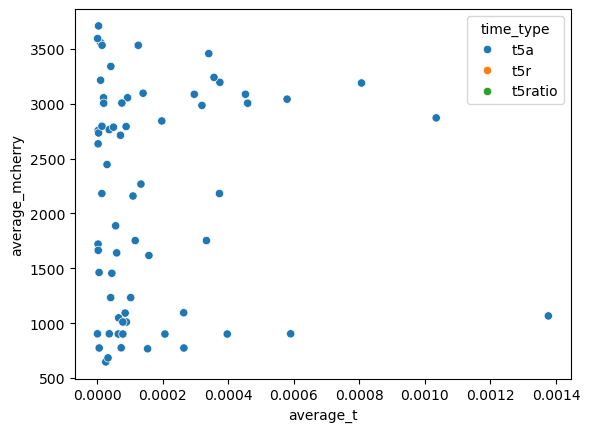

In [20]:
plt = sns.scatterplot(data=alldata_cat[alldata_cat['time_type'].isin(ciber_5_cols)], x="average_t", y="average_mcherry", hue="time_type")
# plt.set(xscale="log", yscale="log")

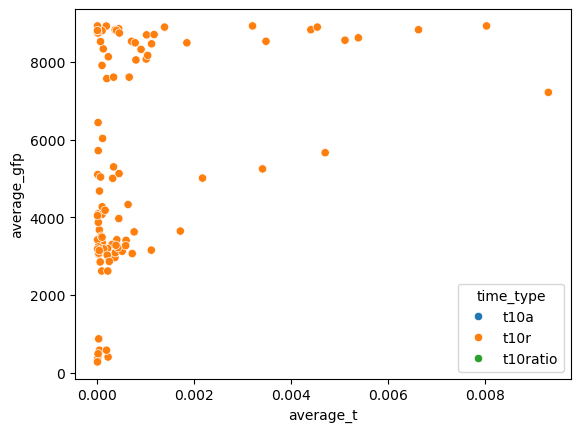

In [22]:
plt = sns.scatterplot(data=alldata_cat[alldata_cat['time_type'].isin(ciber_10_cols)], x="average_t", y="average_gfp", hue="time_type")
# plt.set(xscale="log", yscale="log")

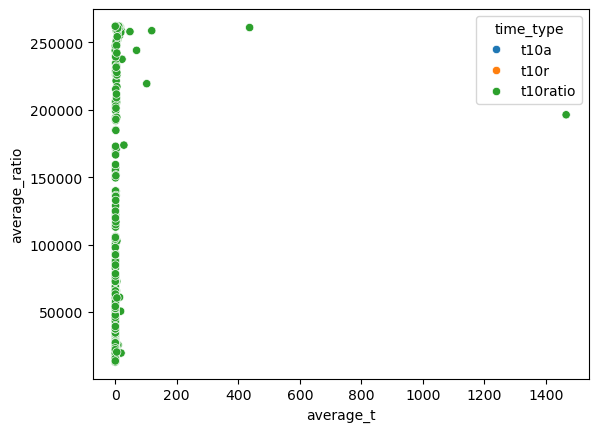

In [23]:
plt = sns.scatterplot(data=alldata_cat[alldata_cat['time_type'].isin(ciber_10_cols)], x="average_t", y="average_ratio", hue="time_type")
# plt.set(xscale="log", yscale="log")